# FBA QUANT AP HW3 

Kim Soo Wan(hse07088@snu.ac.kr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.cm as cm
import matplotlib as mpl

Problem 2.<br/>
A pension fund manager analyzes the relationship between a specific asset and the market. First, he wants to show that the monthly returns of the biggest company are highly correlated with monthly market returns. (Let a risk-free rate be the interest rate of a Treasury bill with a 3-month maturity. You can download the data on FRED: https://fred.stlouisfed.org/series/TB3MS)<br/>
a.	Download the monthly excess returns(monthly return – risk-free rate) of Apple Inc. and S&P 500 from Jan 01, 2013, to Jan 01, 2023, using the yfinance library in python. And then, draw the scatter plot with Apple's monthly returns as dependent variables (y-axis) and the S&P 500 monthly returns as independent variables(x-axis).

In [104]:
TB3M = pd.read_csv('data/TB3MS.csv') # interest rate of Treasury bill with a 3-month maturity as risk free rate
TB3M=TB3M.loc[TB3M["DATE"]>="2013"]
TB3M=TB3M.loc[TB3M["DATE"]<="2023"]
TB3M

,DATE,TB3MS
948,2013-01-01,0.07
949,2013-02-01,0.10
950,2013-03-01,0.09
951,2013-04-01,0.06
952,2013-05-01,0.04
...,...,...
1063,2022-08-01,2.63
1064,2022-09-01,3.13
1065,2022-10-01,3.72
1066,2022-11-01,4.15


In [105]:
def getExcessReturn(data:pd.DataFrame):
    return np.array(data["Open"].pct_change().dropna())-np.array(TB3M[1:]["TB3MS"])

In [106]:
aapl = yf.Ticker("AAPL").history(start="2013-1-1", end="2023-1-1", auto_adjust=True, interval="1mo")
aaplExcessReturn = getExcessReturn(aapl)
aaplExcessReturn

array([-2.71012479e-01, -1.30419946e-01, -5.10961172e-02, -3.42066052e-02,
       -2.91805950e-02, -1.46582840e-01,  9.17639814e-02,  6.90968900e-02,
       -7.97105117e-02,  2.52451886e-02,  1.06235459e-03, -4.41576124e-02,
       -1.45504832e-01, -2.36256034e-03, -2.60302057e-03,  7.08627550e-02,
        3.68598330e-02,  2.62024061e-03, -1.52437419e-02,  7.13871251e-02,
       -4.39669447e-02,  5.58525663e-02,  7.26167938e-02, -9.24525903e-02,
        3.97899193e-02,  6.91959018e-02, -5.42746438e-02, -9.74535577e-03,
        1.74641767e-02, -5.59441469e-02, -1.12553281e-01, -1.09312150e-01,
       -2.98045752e-02, -1.24547360e-02, -2.42762316e-01, -3.95915760e-01,
       -3.69838016e-01, -2.72275750e-01, -1.16021505e-01, -4.06146466e-01,
       -2.09843594e-01, -3.35649573e-01, -2.06586907e-01, -2.67923752e-01,
       -2.68100763e-01, -4.43345532e-01, -5.32239829e-01, -4.60801809e-01,
       -4.23022872e-01, -6.49801787e-01, -7.57792432e-01, -8.80327911e-01,
       -9.20025966e-01, -

In [107]:
sp500 = yf.Ticker("^GSPC").history(start="2013-1-1", end="2023-1-1", auto_adjust=True, interval="1mO")
sp500ExcessReturn = getExcessReturn(sp500)
sp500ExcessReturn

array([-4.95719035e-02, -7.89393512e-02, -2.40188039e-02, -2.19204972e-02,
       -2.86173133e-02, -5.34398466e-02,  9.47260694e-03, -5.16499694e-02,
       -2.16005475e-02, -2.46543854e-02, -4.27923472e-02, -1.82403280e-02,
       -8.42279112e-02, -7.92851340e-03, -2.12364311e-02, -2.44342174e-02,
       -1.90489335e-02, -1.00298128e-02, -4.65571804e-02,  1.84857993e-02,
       -3.62818693e-02,  3.72378613e-03, -6.42957409e-03, -3.33305225e-02,
       -5.02248100e-02,  2.43704939e-02, -3.78603279e-02, -1.04480003e-02,
       -9.81497813e-03, -4.97472754e-02, -5.18626075e-02, -8.38634658e-02,
       -4.56028619e-02, -3.60732512e-02, -2.28957149e-01, -2.81474549e-01,
       -3.59681097e-01, -2.89922546e-01, -1.68293960e-01, -2.64870319e-01,
       -2.57049918e-01, -2.97421060e-01, -2.64841421e-01, -2.90837413e-01,
       -3.33223830e-01, -4.66471677e-01, -4.76415810e-01, -4.86638101e-01,
       -5.04890535e-01, -6.98636592e-01, -8.07474296e-01, -8.78926272e-01,
       -9.68633074e-01, -

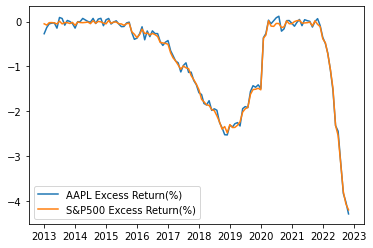

In [108]:
plt.plot(pd.Series(aaplExcessReturn, index=aapl.index[:-1]), label="AAPL Excess Return(%)")
plt.plot(pd.Series(sp500ExcessReturn, index=aapl.index[:-1]), label="S&P500 Excess Return(%)")
plt.legend()
plt.show()

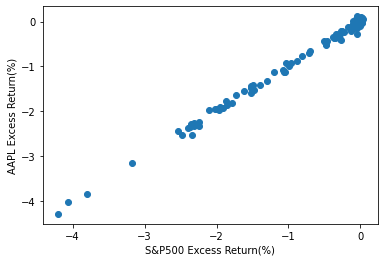

In [109]:

plt.scatter(sp500ExcessReturn,aaplExcessReturn)
plt.xlabel('S&P500 Excess Return(%)')
plt.ylabel('AAPL Excess Return(%)')
plt.show()

b. Calculate the simple linear regression coefficient (alpha, beta) using the above data $$r_{apple}-r_f=α+β(r_{snp500}-r_f )+ϵ$$

In [110]:
model = sm.OLS(aaplExcessReturn, sm.add_constant(sp500ExcessReturn)).fit()
alpha, beta = model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.807e+04
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          3.40e-141
Time:                        23:00:40   Log-Likelihood:                 157.84
No. Observations:                 119   AIC:                            -311.7
Df Residuals:                     117   BIC:                            -306.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.008      1.761      0.0

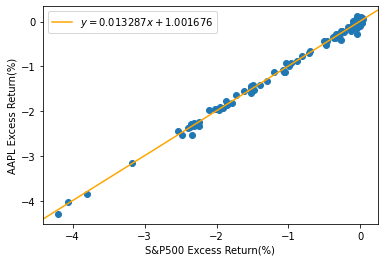

In [111]:
plt.scatter(sp500ExcessReturn,aaplExcessReturn)
plt.axline(xy1=(0, alpha), slope=beta, label=f'$y = {alpha:.6f}x + {beta:.6f}$', color='orange')
plt.xlabel('S&P500 Excess Return(%)')
plt.ylabel('AAPL Excess Return(%)')
plt.legend()
plt.show()

c. Test hypothesis $H_0:β=0,H_1:β>0$ for gradient β at a significance level of 5%.<br/>
Since p-value of beta is .000 we may reject the null hypothesis( $H_0$ ) that beta is 0 at a level of significance 5%.

Problem 3. <br/>
A Student majoring in finance wants to form an efficient frontier of a portfolio of the top five companies in market capitalization within the S&P 500. <br/>
a. Download the daily returns for the top five current market cap companies from Jan 1, 2018, to Jan 1, 2023.

In [112]:
stocks =['AAPL','MSFT','AMZN','GOOGL','NVDA']

dailyReturns=pd.DataFrame()
for i in stocks:
    data = yf.download(i, start="2018-1-1", end="2023-1-1")
    dailyReturns[i]=data['Adj Close'].pct_change().dropna()
dailyReturns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,AMZN,GOOGL,NVDA
Date,,,,,
2018-01-03,-0.000174,0.004654,0.012775,0.017061,0.065814
2018-01-04,0.004645,0.008802,0.004476,0.003884,0.005271
2018-01-05,0.011385,0.012398,0.016163,0.013260,0.008474
2018-01-08,-0.003714,0.001021,0.014425,0.003531,0.030641
2018-01-09,-0.000115,-0.000680,0.004676,-0.001274,-0.000270
...,...,...,...,...,...
2022-12-23,-0.002798,0.002267,0.017425,0.016750,-0.008671
2022-12-27,-0.013878,-0.007414,-0.025924,-0.020621,-0.071353
2022-12-28,-0.030685,-0.010255,-0.014692,-0.015677,-0.006019


b. Find the average annual return (average daily return * 252) and the annual covariance matrix (covariance matrix with daily return * 252)

In [113]:
annualReturns=[]

for i in dailyReturns.columns:
    annualReturns.append(np.average(dailyReturns[i])*252)
annualCov=dailyReturns.cov()*252

print(annualReturns)
print(annualCov)

[0.28746128873604654, 0.26583588660157664, 0.13332817419630513, 0.14895029127852136, 0.35304253656119633]
           AAPL      MSFT      AMZN     GOOGL      NVDA
AAPL   0.112125  0.080322  0.078169  0.073678  0.115570
MSFT   0.080322  0.096307  0.079471  0.078798  0.115866
AMZN   0.078169  0.079471  0.128184  0.076751  0.120108
GOOGL  0.073678  0.078798  0.076751  0.098574  0.109573
NVDA   0.115570  0.115866  0.120108  0.109573  0.269268


c. Draw the following scatter plot of risk and returns using the Monte Carlo simulation. (trials: 20,000)<br/> 
d. Find the point with the largest sharp ratio and draw the CAL. The risk-free rate is assumed to be 2%. 

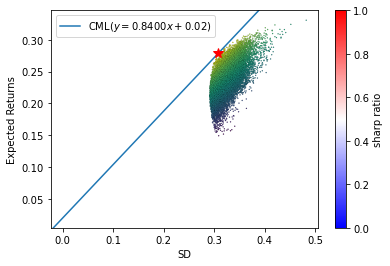

In [118]:
port_ret=[]
port_risk=[]
port_weights=[]
port_sharp=[]

best_risk=0
best_ret=0
best_sharp=0

for i in range(20000):
    weights=np.random.random(len(stocks))
    weights/=np.sum(weights)
    temp_returns=np.dot(weights, annualReturns)
    temp_risk = np.sqrt(np.dot(weights.T, np.dot(annualCov, weights)))
    port_ret.append(temp_returns)
    port_risk.append(temp_risk)
    port_weights.append(weights)
    port_sharp.append((temp_returns-0.02)/temp_risk)
    
    if (port_sharp[i] >best_sharp):
        best_risk=temp_risk
        best_ret=temp_returns
        best_sharp=((temp_returns-0.02)/temp_risk)
    
    
portfolio= {'Returns':port_ret, 'Risk':port_risk, 'Sharp':port_sharp}

norm = mpl.colors.Normalize(0, 1)
cmap = cm.bwr
plt.scatter(portfolio['Risk'],portfolio['Returns'], c = portfolio['Sharp'], s=1.3, edgecolors="black", linewidths=0.1)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), label="sharp ratio")
plt.xlabel("SD")
plt.ylabel("Expected Returns")
plt.axline(xy1=(0, 0.02), slope=best_sharp, label=f'CML($y = {best_sharp:.4f}x + 0.02$)')
plt.plot(best_risk, best_ret, marker='*',markersize=10, color="red")
plt.legend()

plt.show()